## MLP, CNN and VGG on CIFAR-10

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms,models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import time


Files already downloaded and verified

Files already downloaded and verified

Epoch: 1/20..  Training Loss: 1.794..  Test Loss: 1.555..  Test Accuracy: 0.439

Epoch: 2/20..  Training Loss: 1.625..  Test Loss: 1.465..  Test Accuracy: 0.482

Epoch: 3/20..  Training Loss: 1.555..  Test Loss: 1.412..  Test Accuracy: 0.499

Epoch: 4/20..  Training Loss: 1.508..  Test Loss: 1.375..  Test Accuracy: 0.512

Epoch: 5/20..  Training Loss: 1.472..  Test Loss: 1.347..  Test Accuracy: 0.518

Epoch: 6/20..  Training Loss: 1.404..  Test Loss: 1.316..  Test Accuracy: 0.531

Epoch: 7/20..  Training Loss: 1.382..  Test Loss: 1.304..  Test Accuracy: 0.532

Epoch: 8/20..  Training Loss: 1.369..  Test Loss: 1.295..  Test Accuracy: 0.537

Epoch: 9/20..  Training Loss: 1.357..  Test Loss: 1.293..  Test Accuracy: 0.539

Epoch: 10/20..  Training Loss: 1.350..  Test Loss: 1.285..  Test Accuracy: 0.542

Epoch: 11/20..  Training Loss: 1.339..  Test Loss: 1.285..  Test Accuracy: 0.542

Epoch: 12/20..  Training Loss

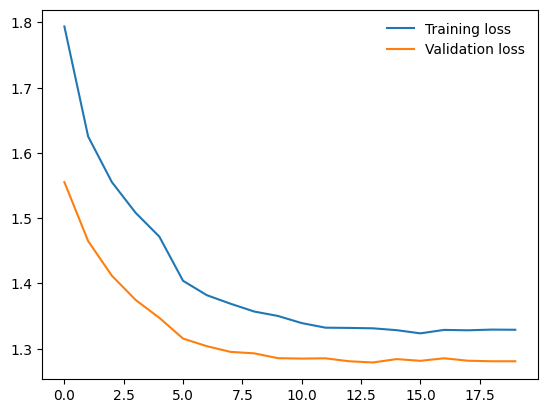

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transformations for the input data
transform = transforms.Compose([
    transforms.ToTensor(), # convert to range [0,1]
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), #mean and stddev is taken as 0.5 for normalization -> convert to range [-1,1]
])

# Loading CIFAR10 using torchvision.datasets
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Data loaders for the train and test sets
trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
testloader = DataLoader(test_data, batch_size=64, shuffle=False)

# Defining MLP model architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)#3072(32*32*3) input features and 512 output features
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.batch_norm2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 64)
        self.batch_norm3 = nn.BatchNorm1d(64)
        self.fc4 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.batch_norm1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.batch_norm2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.batch_norm3(self.fc3(x)))
        x = self.fc4(x)
        return x

model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)#to reduce learning rate by 0.1 every 5 epochs

epochs = 20
train_losses, test_losses = [], []
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()#clearing gradients from previous iterations
        log_ps = model(images)#forward pass and calculating log prob
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0

        # Turning off gradients calculation for validation to increase performance
        with torch.no_grad():
            model.eval()  # Setting the model to evaluation mode, disabling dropout and batch normalization
            for images, labels in testloader:
                log_ps = model(images)
                test_loss += criterion(log_ps, labels)
                ps = torch.exp(log_ps)
                top_p, top_class = ps.topk(1, dim=1)#getting top predictions, the class with the highest predicted prob
                equals = top_class == labels.view(*top_class.shape)#check if predicted class matches the true label
                accuracy += torch.mean(equals.type(torch.FloatTensor))

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{}.. ".format(epoch+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

        scheduler.step()  # Updating the learning rate

    model.train()  # Setting the model back to train mode

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)
plt.show()


The results indicate that the MLP model trained on the CIFAR-10 dataset achieves a test accuracy of around 54% after 20 epochs. This accuracy suggests moderate success in classifying the images into the correct categories. The model demonstrates a gradual decrease in training and test losses over epochs, indicating effective learning and generalization to some extent. However, the achieved accuracy may not be optimal compared to more advanced architectures, suggesting potential limitations in the model's capacity to capture complex patterns within the dataset. Further analysis could involve investigating misclassified samples and potential biases in the dataset to gain deeper insights into the model's performance. Overfitting might also be one reason as the model might be simply memorizing examples.

## CNN

Files already downloaded and verified

Files already downloaded and verified

Epoch: 1/10.. Training Loss: 1.660.. Test Loss: 1.305.. Test Accuracy: 0.535

Epoch: 2/10.. Training Loss: 1.364.. Test Loss: 1.110.. Test Accuracy: 0.608

Epoch: 3/10.. Training Loss: 1.242.. Test Loss: 1.027.. Test Accuracy: 0.643

Epoch: 4/10.. Training Loss: 1.155.. Test Loss: 0.947.. Test Accuracy: 0.671

Epoch: 5/10.. Training Loss: 1.096.. Test Loss: 0.918.. Test Accuracy: 0.680

Epoch: 6/10.. Training Loss: 1.053.. Test Loss: 0.869.. Test Accuracy: 0.701

Epoch: 7/10.. Training Loss: 1.018.. Test Loss: 0.828.. Test Accuracy: 0.713

Epoch: 8/10.. Training Loss: 0.991.. Test Loss: 0.839.. Test Accuracy: 0.709

Epoch: 9/10.. Training Loss: 0.972.. Test Loss: 0.795.. Test Accuracy: 0.725

Epoch: 10/10.. Training Loss: 0.941.. Test Loss: 0.791.. Test Accuracy: 0.725


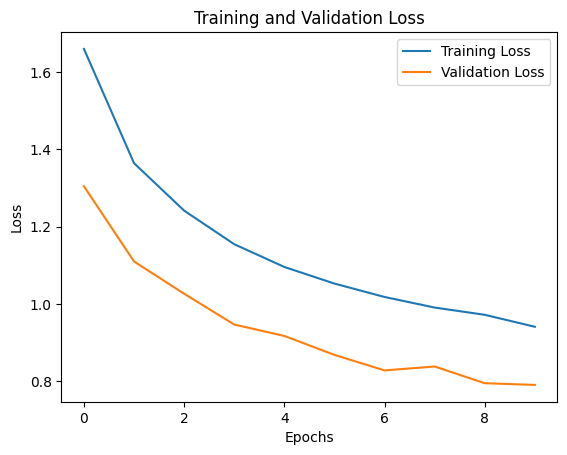

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

transform_train = transforms.Compose([#Data Augmentation
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)


# Data loaders for train and test sets
trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
testloader = DataLoader(test_data, batch_size=64, shuffle=False)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)# 3 input channels, 32 filters(output channels) and kernel=3x3
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)# kernel=2x2 and stride=2
        self.conv3 = nn.Conv2d(64, 64, 3, padding=1)

        self._to_linear = None
        self.convs = nn.Sequential(
            self.conv1,
            self.pool,
            self.conv2,
            self.pool,
            self.conv3,
            self.pool
        )
        self._get_to_linear([64, 3, 32, 32])

        self.fc1 = nn.Linear(self._to_linear, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.2)

    def _get_to_linear(self, shape): #flattening
        with torch.no_grad():
            output = self.convs(torch.zeros(*shape))
            self._to_linear = int(torch.prod(torch.tensor(output.shape[1:])))

    def forward(self, x):
        x = self.convs(x)
        x = x.view(-1, self._to_linear)  # Flattening the tensor
        x = self.dropout(torch.relu(self.fc1(x)))
        x = self.dropout(x)  # Adding additional dropout before final layer
        x = self.fc2(x)
        return x

model = CNN()
criterion = nn.CrossEntropyLoss()
# Updating the optimizer if needed, e.g., lower learning rate
optimizer = optim.Adam(model.parameters(), lr=0.0005)

epochs = 10
train_losses, test_losses = [], []
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
            model.eval()  # Setting the model to evaluation mode
            for images, labels in testloader:
                outputs = model(images)
                test_loss += criterion(outputs, labels)
                _, predicted = torch.max(outputs.data, 1)
                accuracy += (predicted == labels).sum().item()

        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        accuracy = accuracy / len(test_data)

        print(f"Epoch: {epoch+1}/{epochs}.. "
              f"Training Loss: {running_loss/len(trainloader):.3f}.. "
              f"Test Loss: {test_loss/len(testloader):.3f}.. "
              f"Test Accuracy: {accuracy:.3f}")

        model.train()  # Setting the model back to train mode

plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()



When critically comparing the performance of Convolutional Neural Networks (CNNs) to Multi-Layer Perceptrons (MLPs), it becomes evident that CNNs consistently outperform MLPs on image classification tasks such as CIFAR-10. This superiority can be attributed to the architectural differences between the two models. CNNs are specifically designed to handle spatial data efficiently, making them better suited for image processing tasks. The use of convolutional layers in CNNs enables them to extract hierarchical features from images while preserving spatial information, leading to improved accuracy and generalization compared to MLPs. Additionally, CNNs are parameter-efficient due to weight sharing in convolutional layers, allowing them to learn spatial patterns with fewer parameters compared to MLPs. As a result, CNNs exhibit superior performance metrics, including lower training and test losses and higher test accuracy, making them the preferred choice for image classification tasks like CIFAR-10.

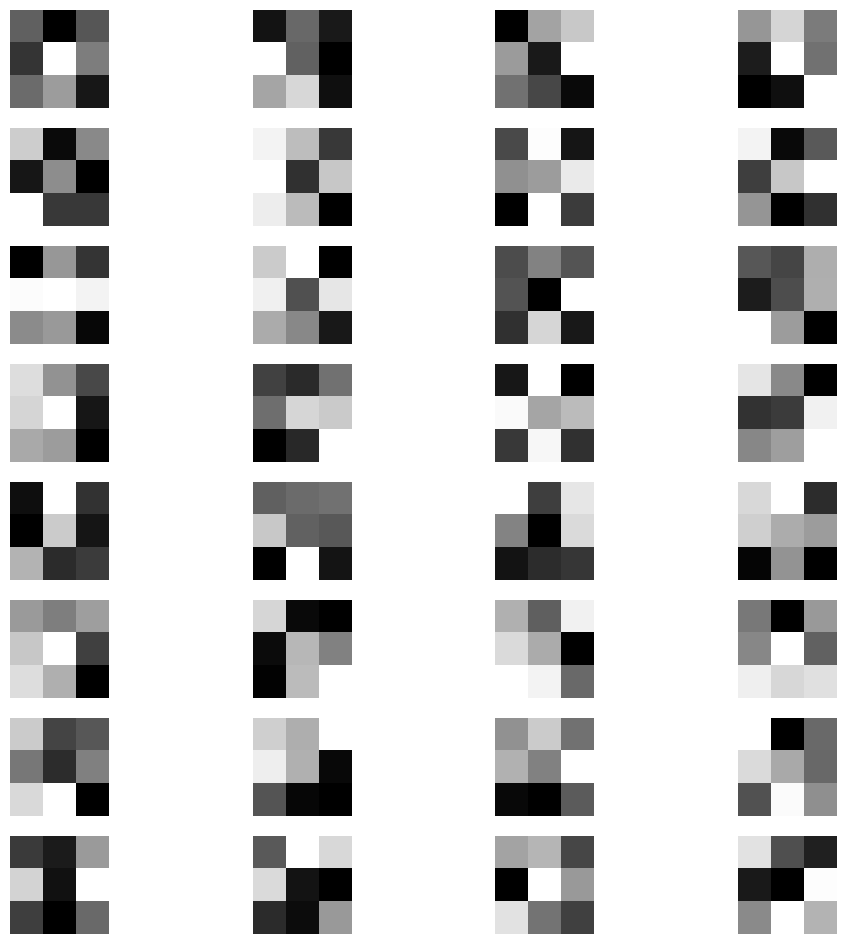

In [ ]:

model2=CNN()
def visualize_filters(model):
    first_conv_layer = model.conv1
    filters = first_conv_layer.weight.data

    n_filters = filters.shape[0]  # Number of filters in the first layer
    plt.figure(figsize=(12, 12))
    for i in range(n_filters):
        filter = filters[i]
        plt.subplot(8, (n_filters + 7) // 8, i + 1)  # Dynamic grid size
        plt.imshow(filter[0, :, :].detach().numpy(), cmap='gray')
        plt.axis('off')
    plt.show()


visualize_filters(model2)


**Visualization Of Filters**:- The visualization of filters in the convolutional layers of the CNN provides insights into the types of features detected during the model's training process. The predominantly white, gray, and black regions in the output maps suggest that the filters are capturing various visual patterns such as edges, textures, and patterns within the input images. The presence of white and black regions indicates the detection of edges and boundaries, while gray regions suggest the identification of textures or repetitive patterns. The diversity of shapes and orientations across the filters reflects the network's ability to detect features at different scales and orientations, contributing to its hierarchical feature extraction process. These learned representations facilitate effective classification or recognition tasks by capturing complex visual information in a hierarchical manner, thereby enhancing the overall performance of the CNN model.

The differences in performance between CNNs and MLPs can be attributed to how each model leverages the spatial structure of images for feature extraction. CNNs are inherently designed to exploit the spatial dependencies present in images by using convolutional filters and pooling layers. These convolutional operations allow CNNs to capture local patterns such as edges, textures, and shapes, which are crucial for image classification tasks. Furthermore, CNNs can learn hierarchical representations of images, where lower layers detect simple features like edges, while higher layers combine these features to detect more complex patterns. In contrast, MLPs treat input images as flattened vectors, disregarding the spatial relationships between pixels. This limitation prevents MLPs from effectively capturing spatial dependencies, resulting in suboptimal feature extraction and lower classification accuracy compared to CNNs. Therefore, CNNs' ability to leverage the spatial structure of images enables them to achieve better performance by capturing meaningful features and spatial relationships essential for accurate image classification.

## VGG

Using device: cuda:0
Files already downloaded and verified
Files already downloaded and verified
Epoch 1/5, Training Loss: 0.7837, Test Loss: 0.5248, Accuracy: 82.97%
Epoch 2/5, Training Loss: 0.5634, Test Loss: 0.5598, Accuracy: 82.49%
Epoch 3/5, Training Loss: 0.4889, Test Loss: 0.5415, Accuracy: 83.24%
Epoch 4/5, Training Loss: 0.4233, Test Loss: 0.5354, Accuracy: 84.48%
Epoch 5/5, Training Loss: 0.3857, Test Loss: 0.4943, Accuracy: 85.13%


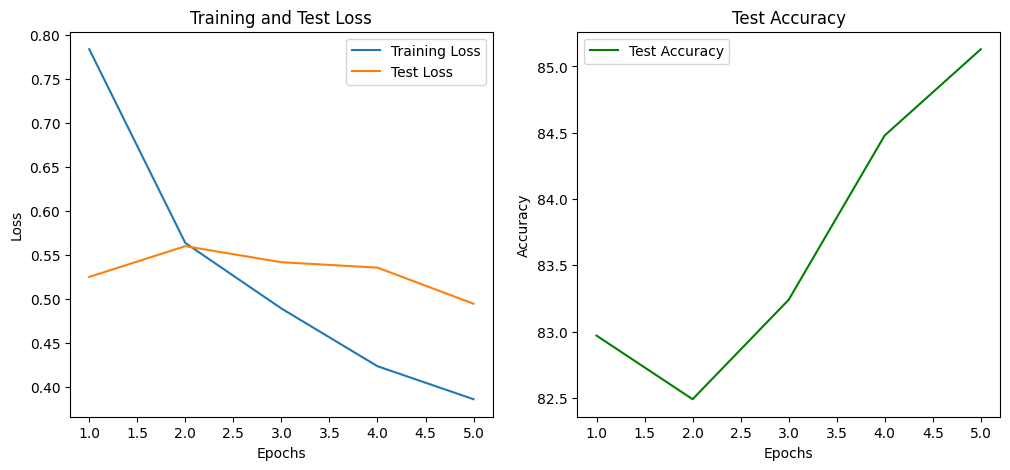

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Checking for CUDA availability
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Data Preprocessing
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Loading CIFAR10 dataset
train_data = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Data loaders
trainloader = DataLoader(train_data, batch_size=64, shuffle=True)
testloader = DataLoader(test_data, batch_size=64, shuffle=False)

# Loading pre-trained VGG16 model
model = models.vgg16(pretrained=True)#model is initialized with pretrained ImageNet weights

# Freezing the feature layers[conv and pool](to keep the info learned during pre-training)
for param in model.features.parameters():
    param.requires_grad = False

# Modifying the classifier for CIFAR-10 (10 classes from 1000 classes(ImageNet)) (Transfer Learning)
num_features = model.classifier[6].in_features#modifying the last fully connected layer
model.classifier[6] = nn.Linear(num_features, 10)

# Moving model to the chosen device
model = model.to(device)

# Loss function and optimizer (only optimizing classifier parameters)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001)


train_losses = []
test_losses = []
test_accuracies = []

# Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()  # Training mode
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    train_loss = running_loss / len(trainloader)
    train_losses.append(train_loss)

    # Testing Loop
    model.eval()  # Evaluation mode
    correct = 0
    total = 0
    test_loss = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    test_loss = test_loss / len(testloader)
    test_losses.append(test_loss)
    accuracy = 100 * correct / total
    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Training Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%")

# Plotting the training and validation loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), test_losses, label='Test Loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), test_accuracies, label='Test Accuracy', color='green')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Transfer learning presents several advantages over training MLP and CNN models from scratch. When starting with pre-trained models like VGG, the network already possesses knowledge gained from learning rich hierarchical representations of features from vast datasets such as ImageNet. By fine-tuning these models on a new dataset like CIFAR-10, transfer learning allows for quicker adaptation to the new task. This leads to improved performance compared to training models from scratch, particularly when working with smaller or similar datasets. Additionally, transfer learning significantly reduces the training time and computational resources required. Rather than building models from the ground up, fine-tuning pre-trained models enables us to benefit from the already learned feature representations, resulting in faster convergence and better utilization of resources.

In the case of using the VGG model for CIFAR-10 classification, transfer learning played a crucial role in enhancing performance and reducing training time. By utilizing the pre-trained weights from ImageNet, the VGG model started with a strong foundation of learned visual features. Fine-tuning the model on CIFAR-10 allowed it to adapt quickly to the new dataset while preserving the knowledge acquired during pre-training. Consequently, transfer learning helped improve the model's accuracy on CIFAR-10, leveraging the generalization capabilities and feature extraction capabilities of the pre-trained VGG network. Furthermore, by fine-tuning only the final layers of the network, transfer learning optimized the training process, resulting in faster convergence and efficient utilization of computational resources.